In [330]:
import pandas as pd
import re
import time

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
all_data = pd.read_csv('../data/election_census_final')
description = pd.read_csv('../data/var_description.csv')

In [332]:
y = all_data.target
model_data = all_data.drop(all_data.iloc[:, 0:8], axis = 1)
X = model_data.drop(model_data.columns[260:263], axis = 1)
X.shape

(3136, 260)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [334]:
scaler = StandardScaler()

In [335]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating Base Case with Logistic, RFC, and SVM

In [336]:
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()
xgb = XGBClassifier()

In [337]:
# Method to compare different models
def get_score(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    fit_time = (time.time()) - start_time
    cm = ConfusionMatrix(model)
    cm.score(X_test_scaled, y_test)
    cm.poof()
    plt.show()
    return print('SCORE: ' + str(score) + "FIT TIME: " + str(fit_time), str(model))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


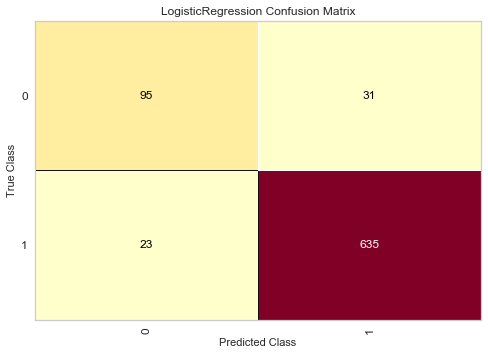

SCORE: 0.9311224489795918FIT TIME: 0.2543618679046631 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


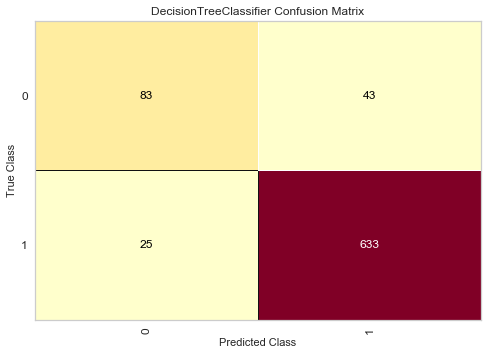

SCORE: 0.9132653061224489FIT TIME: 0.35105419158935547 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


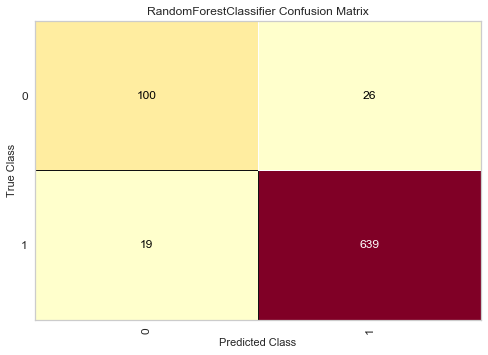

SCORE: 0.9426020408163265FIT TIME: 0.13036417961120605 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


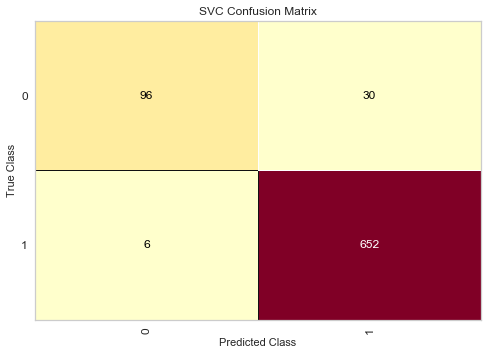

SCORE: 0.9540816326530612FIT TIME: 0.6758518218994141 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


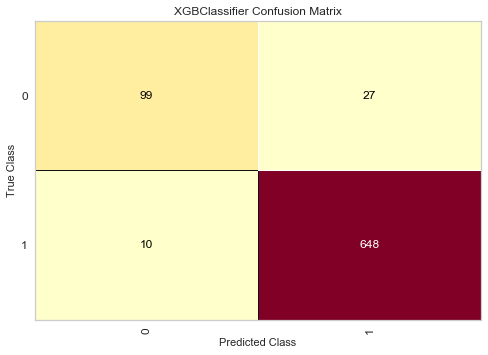

SCORE: 0.9528061224489796FIT TIME: 2.604957342147827 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [338]:
get_score(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
get_score(dtc, X_train_scaled, X_test_scaled, y_train, y_test)
get_score(rfc, X_train_scaled, X_test_scaled, y_train, y_test)
get_score(svm, X_train_scaled, X_test_scaled, y_train, y_test)
get_score(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [117]:

cross_val_score(LogisticRegression(), X, y, cv=10)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.9047619 , 0.91746032, 0.92038217, 0.93312102, 0.91054313,
       0.89456869, 0.94888179, 0.92332268, 0.87859425, 0.8913738 ])

In [116]:
cross_val_score(RandomForestClassifier(), X, y, cv=10)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

array([0.93650794, 0.90793651, 0.94585987, 0.93949045, 0.93929712,
       0.91054313, 0.93929712, 0.92971246, 0.85303514, 0.88817891])

In [115]:

cross_val_score(SVC(), X, y, cv=10)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

array([0.83809524, 0.83809524, 0.84076433, 0.84076433, 0.84025559,
       0.84025559, 0.84025559, 0.84025559, 0.84025559, 0.79552716])

# Reducing Features from 260 down to 15+

In [391]:
log_reg = LogisticRegression()
results = log_reg.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [392]:
feaures = pd.Series(results.coef_[0]).apply(lambda x: "{:0.2f}".format(x))

In [393]:
feaures.head(15)

0     -0.08
1      0.10
2      0.30
3     -0.44
4      0.49
5      0.29
6      1.01
7      0.39
8      0.57
9      0.02
10     0.13
11    -0.66
12    -0.13
13     0.07
14    -0.37
dtype: object

In [396]:
features_df = pd.DataFrame(feaures, columns=['Importance'], index=range(260))

In [386]:
features_df.head(2)

Importance
0      -0.04
1       0.07

In [347]:
X.iloc[0,:].T

DP05_0050PE     0.0
DP03_0048PE    18.1
DP04_0029PE     0.9
DP03_0022PE     1.6
DP04_0003PE    20.1
DP03_0035PE    18.2
DP03_0066PE    40.4
DP04_0047PE    26.3
DP05_0081PE     0.0
DP04_0123PE     5.1
DP03_0079PE    10.0
DP03_0053PE    11.2
DP05_0015PE    10.3
DP05_0002PE    47.6
DP04_0034PE    17.2
DP04_0141PE     8.1
DP03_0097PE    60.5
DP05_0059PE     0.7
DP03_0040PE     3.3
DP04_0021PE    14.8
DP05_0046PE     0.0
DP04_0078PE     1.2
DP04_0052PE    22.7
DP04_0065PE    59.2
DP03_0084PE     1.7
DP03_0107PE     5.4
DP05_0020PE    82.1
DP03_0005PE     5.8
DP04_0119PE    17.4
DP05_0077PE    54.1
               ... 
DP03_0012PE    38.8
DP05_0005PE     5.6
DP03_0043PE     4.2
DP04_0122PE     4.0
DP04_0002PE    79.9
DP04_0059PE    31.5
DP03_0056PE    15.0
DP05_0049PE     0.0
DP03_0030PE    12.7
DP04_0033PE    24.1
DP04_0046PE    73.7
DP04_0020PE    19.2
DP03_0074PE    17.2
DP05_0036PE    98.5
DP04_0077PE    98.2
DP05_0023PE    21.5
DP03_0128PE    22.9
DP04_0064PE    17.5
DP05_0067PE     0.2


In [407]:
features_names_df = pd.DataFrame(X.iloc[0,:].T)
features_names_df.reset_index(inplace=True)

features_names_df.columns = ['code', 0]

# features_names_df['Code'] = feauters_names_df.index
features_names_df.head(3)

code     0
0  DP05_0050PE   0.0
1  DP03_0048PE  18.1
2  DP04_0029PE   0.9

In [408]:
features_names_df.index= range(260)
features_names_df.head(2)

code     0
0  DP05_0050PE   0.0
1  DP03_0048PE  18.1

In [409]:
features_names_df.drop(feauters_names_df.columns[0], axis = 1)

code
0    DP05_0050PE
1    DP03_0048PE
2    DP04_0029PE
3    DP03_0022PE
4    DP04_0003PE
5    DP03_0035PE
6    DP03_0066PE
7    DP04_0047PE
8    DP05_0081PE
9    DP04_0123PE
10   DP03_0079PE
11   DP03_0053PE
12   DP05_0015PE
13   DP05_0002PE
14   DP04_0034PE
15   DP04_0141PE
16   DP03_0097PE
17   DP05_0059PE
18   DP03_0040PE
19   DP04_0021PE
20   DP05_0046PE
21   DP04_0078PE
22   DP04_0052PE
23   DP04_0065PE
24   DP03_0084PE
25   DP03_0107PE
26   DP05_0020PE
27   DP03_0005PE
28   DP04_0119PE
29   DP05_0077PE
..           ...
230  DP03_0012PE
231  DP05_0005PE
232  DP03_0043PE
233  DP04_0122PE
234  DP04_0002PE
235  DP04_0059PE
236  DP03_0056PE
237  DP05_0049PE
238  DP03_0030PE
239  DP04_0033PE
240  DP04_0046PE
241  DP04_0020PE
242  DP03_0074PE
243  DP05_0036PE
244  DP04_0077PE
245  DP05_0023PE
246  DP03_0128PE
247  DP04_0064PE
248  DP05_0067PE
249  DP03_0061PE
250  DP04_0140PE
251  DP05_0010PE
252  DP04_0118PE
253  DP05_0054PE
254  DP04_0051PE
255  DP05_0041PE
256  DP04_0082PE
257  DP04_0105PE
258  DP03_0115PE
259  DP03_0039PE

[260 rows x 1 columns]

In [410]:
features_df.head(2)

Importance
0      -0.08
1       0.10

In [413]:
new_df = pd.merge(features_df, features_names_df, left_index=True, right_index=True)

In [417]:
new_df.head()
description.head()
description.columns=(["code", "label"])

In [427]:
top_features = pd.merge(new_df, description, on="code", how="left")
top_features.sort_values(by="Importance", ascending=False)


Importance         code     0  \
29   1.07       DP05_0077PE  54.1   
6    1.01       DP03_0066PE  40.4   
216  0.98       DP03_0060PE  1.1    
256  0.92       DP04_0082PE  31.7   
204  0.83       DP04_0014PE  22.8   
48   0.82       DP03_0054PE  13.2   
96   0.82       DP03_0136PE  20.5   
163  0.61       DP05_0042PE  0.0    
188  0.61       DP05_0012PE  14.6   
8    0.57       DP05_0081PE  0.0    
125  0.54       DP03_0119PE  17.5   
134  0.53       DP05_0076PE  95.9   
197  0.53       DP04_0129PE  4.6    
113  0.53       DP03_0021PE  0.9    
238  0.52       DP03_0030PE  12.7   
153  0.51       DP05_0037PE  56.0   
31   0.51       DP05_0064PE  57.2   
23   0.50       DP04_0065PE  59.2   
4    0.49       DP04_0003PE  20.1   
97   0.48       DP03_0029PE  22.4   
22   0.42       DP04_0052PE  22.7   
82   0.42       DP05_0026PE  46.4   
147  0.41       DP03_0044PE  5.6    
142  0.41       DP05_0019PE  20.8   
169  0.40       DP03_0080PE  13.8   
201  0.39       DP03_0068PE  25.1   
7    0.39       DP04_0047PE  26.3   
67   0.38       DP04_0084PE  12.4   
79   0.38       DP03_0033PE  4.1    
129  0.38       DP05_0089PE  52.6   
..    ...               ...   ...   
12   -0.13      DP05_0015PE  10.3   
199  -0.13      DP04_0103PE  26.1   
243  -0.12      DP05_0036PE  98.5   
57   -0.12      DP05_0034PE  98.5   
53   -0.09      DP03_0098PE  45.5   
102  -0.09      DP04_0139PE  4.9    
258  -0.09      DP03_0115PE  89.6   
32   -0.09      DP05_0051PE  0.1    
0    -0.08      DP05_0050PE  0.0    
171  -0.07      DP05_0073PE  0.2    
21   -0.07      DP04_0078PE  1.2    
46   -0.07      DP05_0003PE  52.4   
120  -0.06      DP03_0052PE  14.0   
24   -0.06      DP03_0084PE  1.7    
257  -0.05      DP04_0105PE  19.7   
206  -0.05      DP03_0055PE  10.3   
170  -0.04      DP04_0092PE  59.7   
151  -0.04      DP04_0069PE  0.0    
115  -0.04      DP04_0131PE  0.0    
15   -0.03      DP04_0141PE  8.1    
17   -0.02      DP05_0059PE  0.7    
215  -0.02      DP03_0007PE  52.5   
135  -0.02      DP03_0004PE  41.7   
81   -0.02      DP03_0064PE  62.5   
218  -0.02      DP05_0066PE  0.4    
214  -0.02      DP05_0022PE  75.2   
43   -0.01      DP05_0016PE  5.3    
131  -0.01      DP03_0070PE  8.2    
187  -0.01      DP04_0044PE  1.7    
157  -0.01      DP05_0068PE  0.0    

                                                                                                                                                                             label  
29    Hispanic Or Latino And Race Total Population Not Hispanic Or Latino White Alone                                                                                               
6     Income And Benefits (In 2017 Inflation-Adjusted Dollars) Total Households With Social Security                                                                                
216   Income And Benefits (In 2017 Inflation-Adjusted Dollars) Total Households $150 000 To $199 999                                                                                
256   Value Owner-Occupied Units $50 000 To $99 999                                                                                                                                 
204   Units In Structure Total Housing Units Mobile Home                                                                                                                            
48    Income And Benefits (In 2017 Inflation-Adjusted Dollars) Total Households $15 000 To $24 999                                                                                  
96    Percentage Of Families And People Whose Income In The Past 12 Months Is Below The Poverty Level People In Families                                                            
163   Race Total Population One Race American Indian And Alaska Native Navajo Tribal Grouping                                                                                       
188   Sex And Age Total Population 45 To 54 Years                               